# Heart Failure Clinical Records Clustering Analysis

## This notebook provides a comprehensive clustering analysis of heart failure clinical records with visualizations, multiple evaluation metrics, and detailed insights.

# Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Load and Explore the Dataset

In [2]:
# Load the heart failure dataset from UCI ML Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"

try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully")
except:
    print("Loading from URL failed, using local file")
    df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print(f"\n Dataset Shape: {df.shape}")
print(f"Features: {list(df.columns)}")
print(f"\n Dataset Info:")
print(df.info())

Dataset loaded successfully

 Dataset Shape: (299, 13)
Features: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex        

# Data Exploration

In [3]:
print("Dataset Statistics:")
print(df.describe())
print(f"\n Missing Values:")
print(df.isnull().sum())
print(f"\n First 5 rows:")
df.head()

Dataset Statistics:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.00

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Visualization

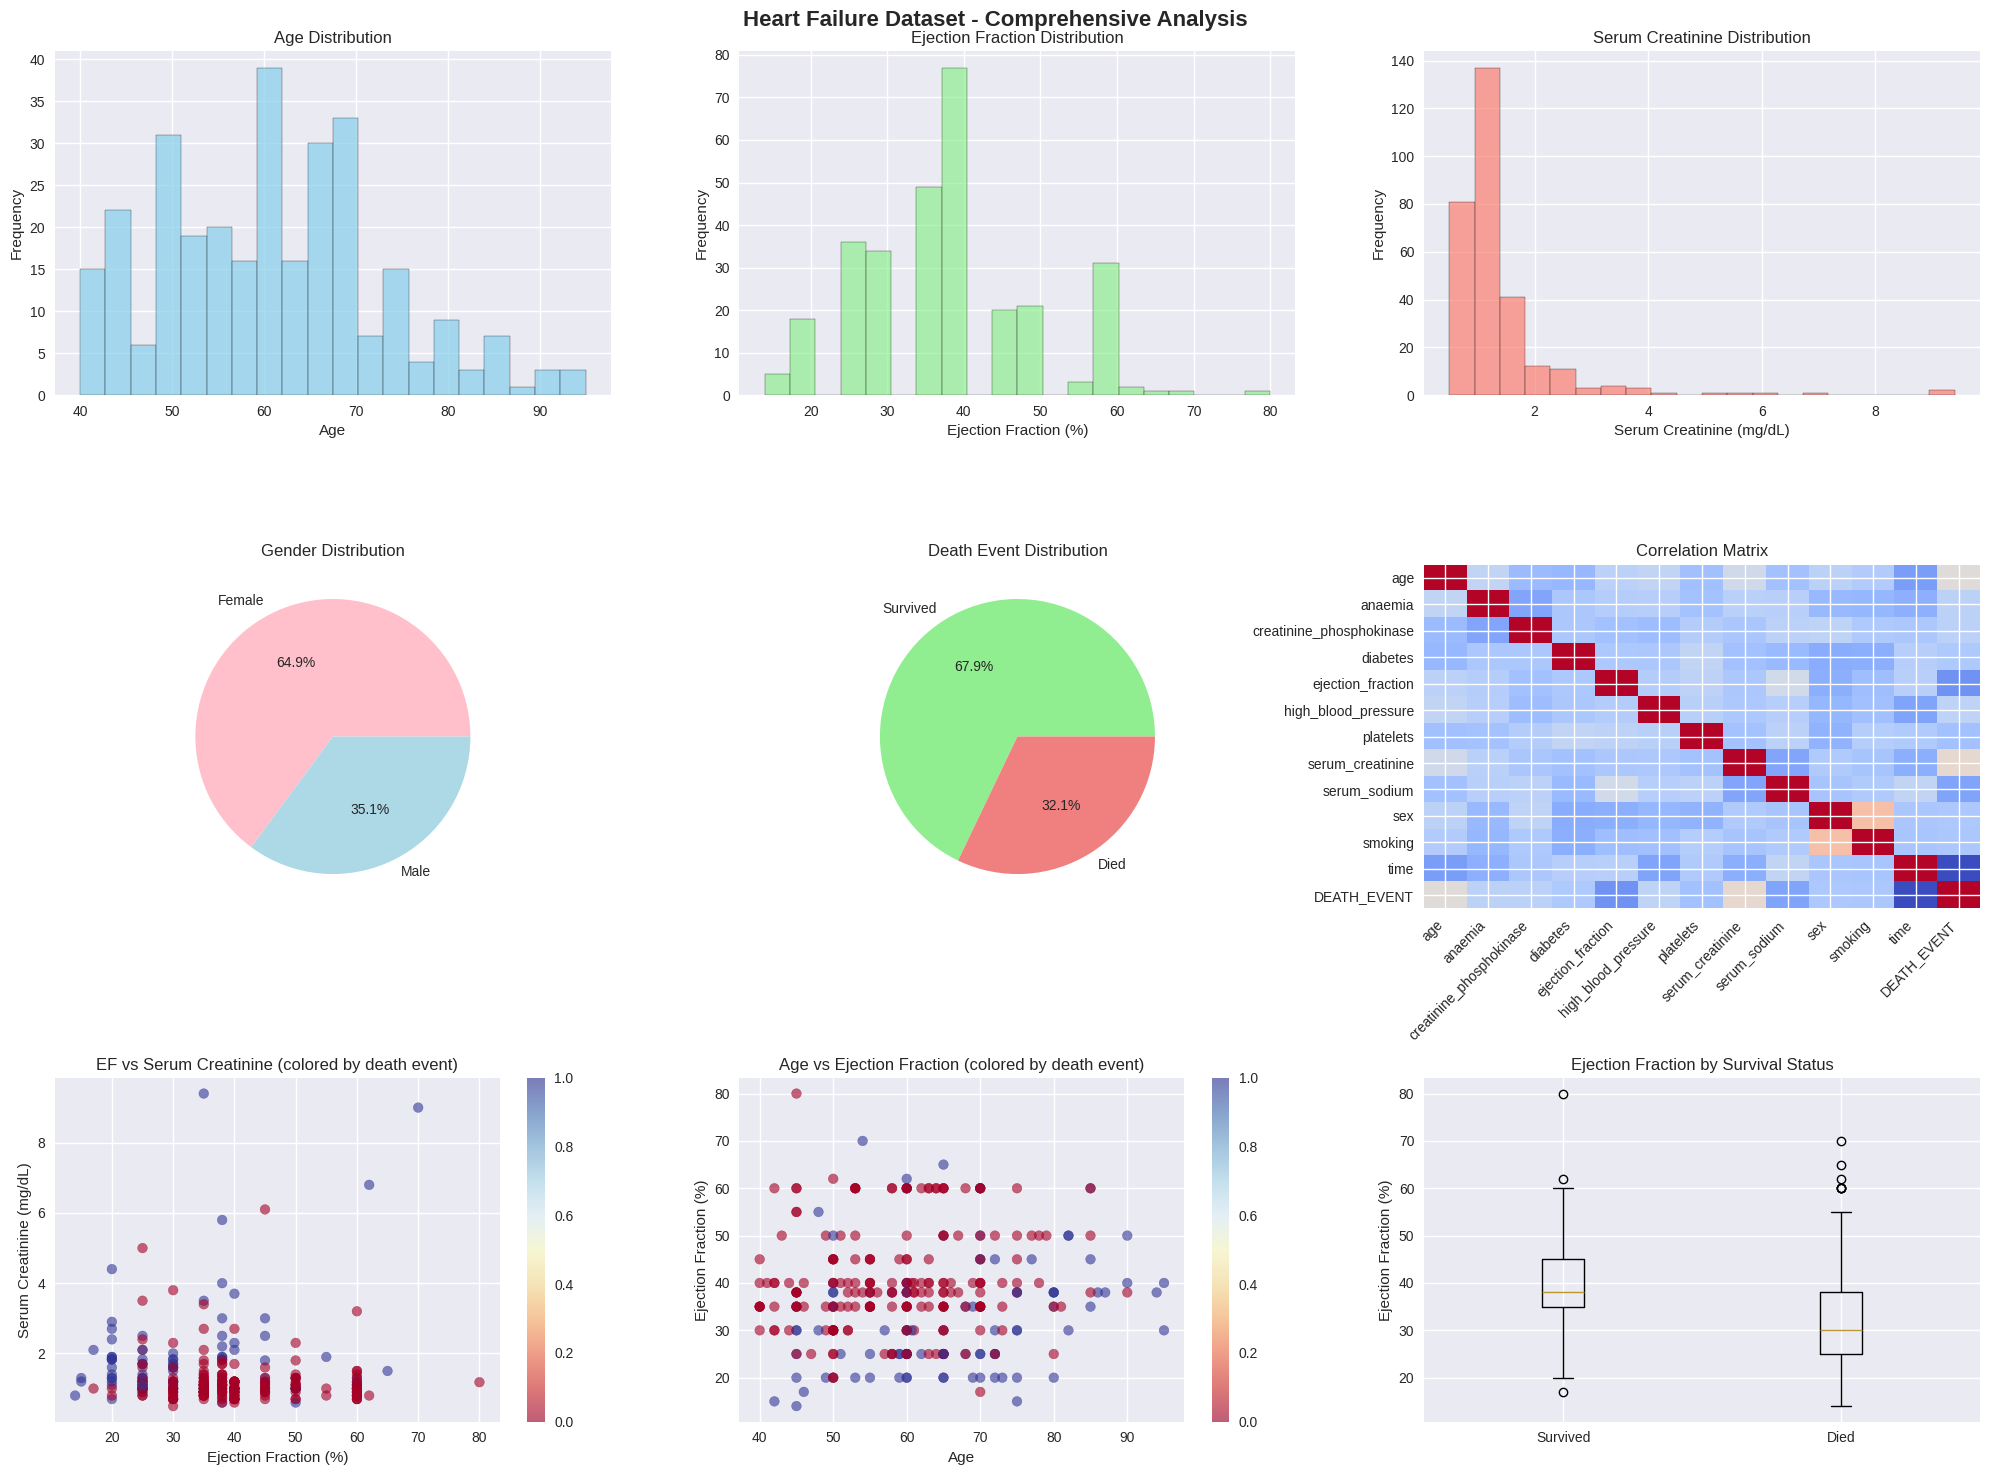

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Heart Failure Dataset - Comprehensive Analysis', fontsize=16, fontweight='bold')

axes[0,0].hist(df['age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

axes[0,1].hist(df['ejection_fraction'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Ejection Fraction Distribution')
axes[0,1].set_xlabel('Ejection Fraction (%)')
axes[0,1].set_ylabel('Frequency')

axes[0,2].hist(df['serum_creatinine'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[0,2].set_title('Serum Creatinine Distribution')
axes[0,2].set_xlabel('Serum Creatinine (mg/dL)')
axes[0,2].set_ylabel('Frequency')

gender_counts = df['sex'].value_counts()
axes[1,0].pie(gender_counts.values, labels=['Female', 'Male'], autopct='%1.1f%%',
              colors=['pink', 'lightblue'])
axes[1,0].set_title('Gender Distribution')

death_counts = df['DEATH_EVENT'].value_counts()
axes[1,1].pie(death_counts.values, labels=['Survived', 'Died'], autopct='%1.1f%%',
              colors=['lightgreen', 'lightcoral'])
axes[1,1].set_title('Death Event Distribution')

numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
im = axes[1,2].imshow(corr_matrix, cmap='coolwarm', aspect='auto')
axes[1,2].set_title('Correlation Matrix')
axes[1,2].set_xticks(range(len(numeric_cols)))
axes[1,2].set_yticks(range(len(numeric_cols)))
axes[1,2].set_xticklabels(numeric_cols, rotation=45, ha='right')
axes[1,2].set_yticklabels(numeric_cols)

scatter = axes[2,0].scatter(df['ejection_fraction'], df['serum_creatinine'],
                           c=df['DEATH_EVENT'], cmap='RdYlBu', alpha=0.6)
axes[2,0].set_xlabel('Ejection Fraction (%)')
axes[2,0].set_ylabel('Serum Creatinine (mg/dL)')
axes[2,0].set_title('EF vs Serum Creatinine (colored by death event)')
plt.colorbar(scatter, ax=axes[2,0])

scatter2 = axes[2,1].scatter(df['age'], df['ejection_fraction'],
                            c=df['DEATH_EVENT'], cmap='RdYlBu', alpha=0.6)
axes[2,1].set_xlabel('Age')
axes[2,1].set_ylabel('Ejection Fraction (%)')
axes[2,1].set_title('Age vs Ejection Fraction (colored by death event)')
plt.colorbar(scatter2, ax=axes[2,1])

death_labels = ['Survived', 'Died']
axes[2,2].boxplot([df[df['DEATH_EVENT']==0]['ejection_fraction'],
                   df[df['DEATH_EVENT']==1]['ejection_fraction']],
                  labels=death_labels)
axes[2,2].set_title('Ejection Fraction by Survival Status')
axes[2,2].set_ylabel('Ejection Fraction (%)')

plt.tight_layout()
plt.show()

# Feature Selection and Preprocessing

In [6]:
clustering_features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium',
                      'creatinine_phosphokinase', 'platelets']

print(f"Selected features for clustering: {clustering_features}")
X = df[clustering_features].copy()
print(f"\n Missing values in selected features:")
print(X.isnull().sum())
print(f"\n Statistics of selected features:")
print(X.describe())

Selected features for clustering: ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'creatinine_phosphokinase', 'platelets']

 Missing values in selected features:
age                         0
ejection_fraction           0
serum_creatinine            0
serum_sodium                0
creatinine_phosphokinase    0
platelets                   0
dtype: int64

 Statistics of selected features:
              age  ejection_fraction  serum_creatinine  serum_sodium  \
count  299.000000         299.000000         299.00000    299.000000   
mean    60.833893          38.083612           1.39388    136.625418   
std     11.894809          11.834841           1.03451      4.412477   
min     40.000000          14.000000           0.50000    113.000000   
25%     51.000000          30.000000           0.90000    134.000000   
50%     60.000000          38.000000           1.10000    137.000000   
75%     70.000000          45.000000           1.40000    140.000000   
max     95.000000

# Data Standardization and PCA Analysis

Features standardized successfully
Scaled data shape: (299, 6)


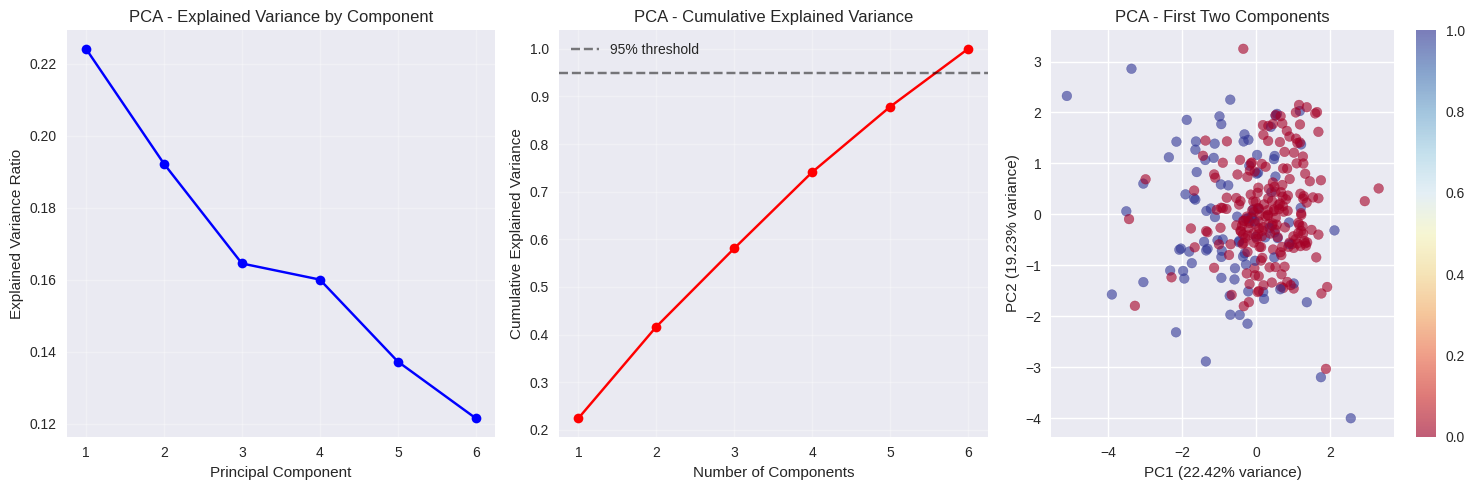


 Explained variance by first 2 components: 41.65%


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features standardized successfully")
print(f"Scaled data shape: {X_scaled.shape}")

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance by Component')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.95, color='k', linestyle='--', alpha=0.5, label='95% threshold')
plt.legend()
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['DEATH_EVENT'],
                     cmap='RdYlBu', alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA - First Two Components')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

print(f"\n Explained variance by first 2 components: {pca.explained_variance_ratio_[:2].sum():.2%}")

# K-Means Clustering

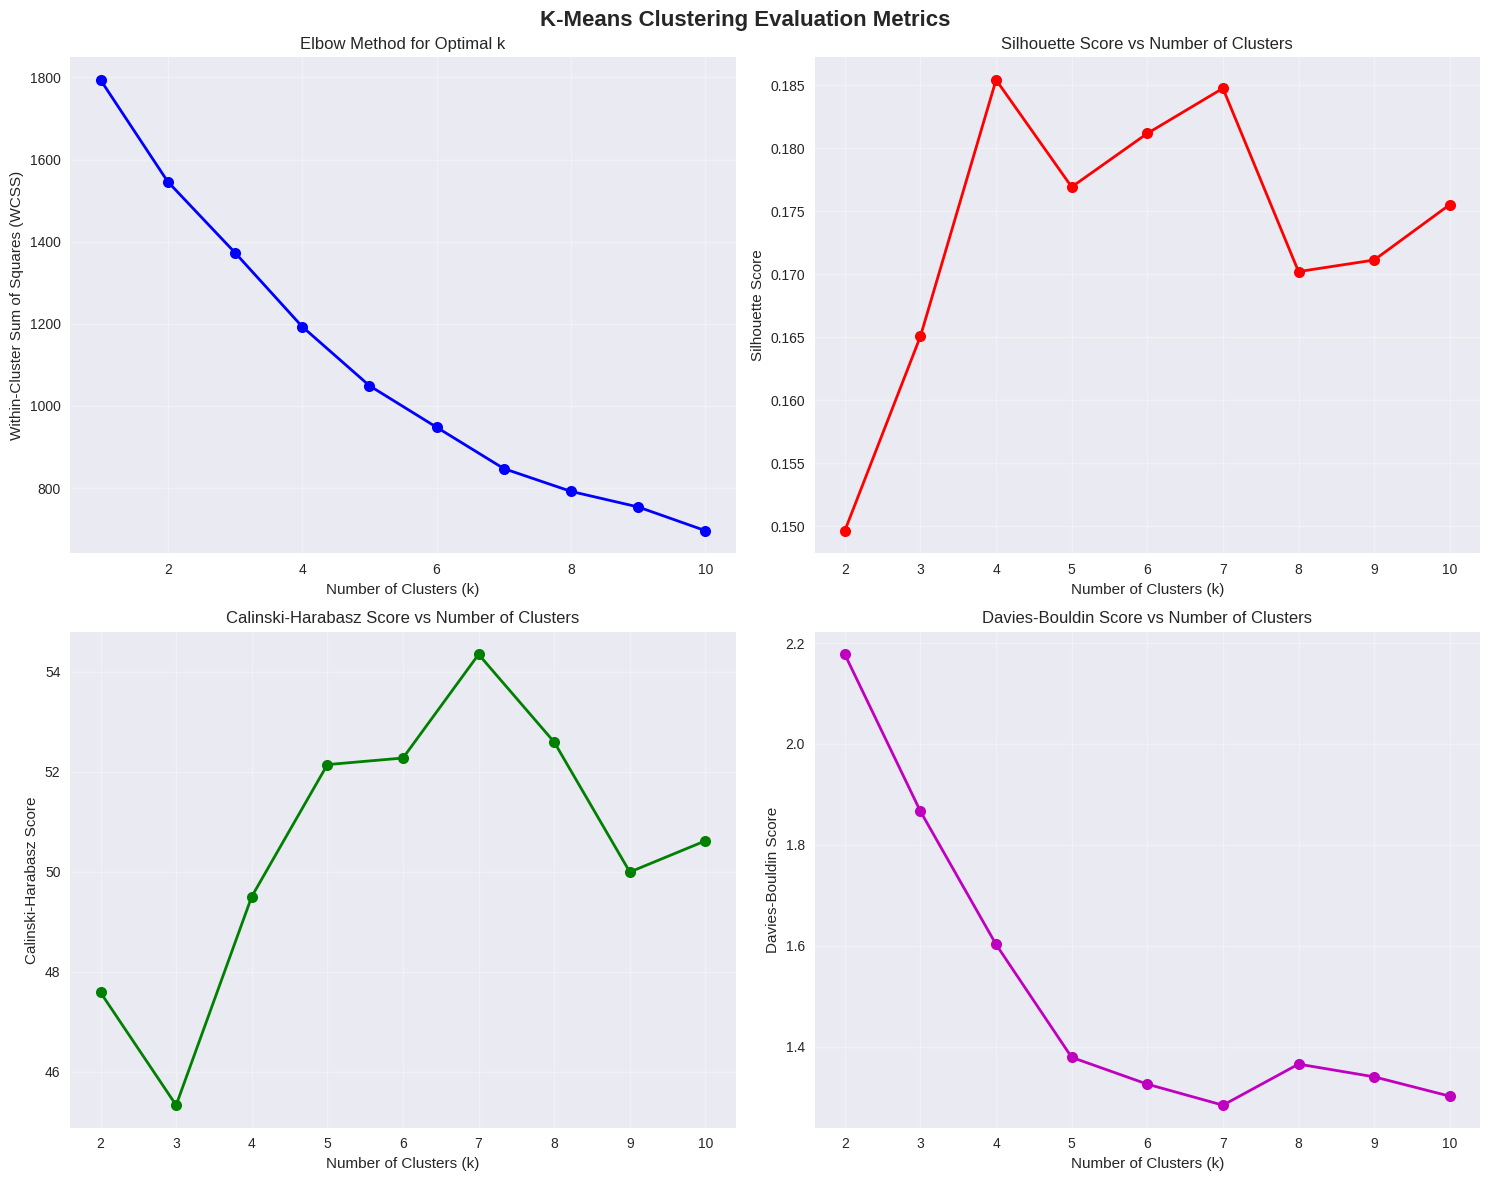

Optimal k based on different metrics:
Silhouette Score: k = 4
Calinski-Harabasz Score: k = 7
Davies-Bouldin Score: k = 7


In [8]:
def evaluate_kmeans(X, max_k=10):
    """Evaluate K-means clustering using multiple metrics"""
    K_range = range(1, max_k + 1)
    wcss = []
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)

        wcss.append(kmeans.inertia_)

        if k > 1:
            silhouette_scores.append(silhouette_score(X, labels))
            calinski_scores.append(calinski_harabasz_score(X, labels))
            davies_bouldin_scores.append(davies_bouldin_score(X, labels))

    return K_range, wcss, silhouette_scores, calinski_scores, davies_bouldin_scores

K_range, wcss, sil_scores, cal_scores, db_scores = evaluate_kmeans(X_scaled, max_k=10)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('K-Means Clustering Evaluation Metrics', fontsize=16, fontweight='bold')

axes[0,0].plot(K_range, wcss, 'bo-', linewidth=2, markersize=8)
axes[0,0].set_xlabel('Number of Clusters (k)')
axes[0,0].set_ylabel('Within-Cluster Sum of Squares (WCSS)')
axes[0,0].set_title('Elbow Method for Optimal k')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].plot(K_range[1:], sil_scores, 'ro-', linewidth=2, markersize=8)
axes[0,1].set_xlabel('Number of Clusters (k)')
axes[0,1].set_ylabel('Silhouette Score')
axes[0,1].set_title('Silhouette Score vs Number of Clusters')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].plot(K_range[1:], cal_scores, 'go-', linewidth=2, markersize=8)
axes[1,0].set_xlabel('Number of Clusters (k)')
axes[1,0].set_ylabel('Calinski-Harabasz Score')
axes[1,0].set_title('Calinski-Harabasz Score vs Number of Clusters')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].plot(K_range[1:], db_scores, 'mo-', linewidth=2, markersize=8)
axes[1,1].set_xlabel('Number of Clusters (k)')
axes[1,1].set_ylabel('Davies-Bouldin Score')
axes[1,1].set_title('Davies-Bouldin Score vs Number of Clusters')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

optimal_k_sil = K_range[1:][np.argmax(sil_scores)]
optimal_k_cal = K_range[1:][np.argmax(cal_scores)]
optimal_k_db = K_range[1:][np.argmin(db_scores)]

print(f"Optimal k based on different metrics:")
print(f"Silhouette Score: k = {optimal_k_sil}")
print(f"Calinski-Harabasz Score: k = {optimal_k_cal}")
print(f"Davies-Bouldin Score: k = {optimal_k_db}")

# K-Means Final Implementation and Visualization

K-Means Clustering Results (k=3):
Silhouette Score: 0.165
Calinski-Harabasz Score: 45.329
Davies-Bouldin Score: 1.867


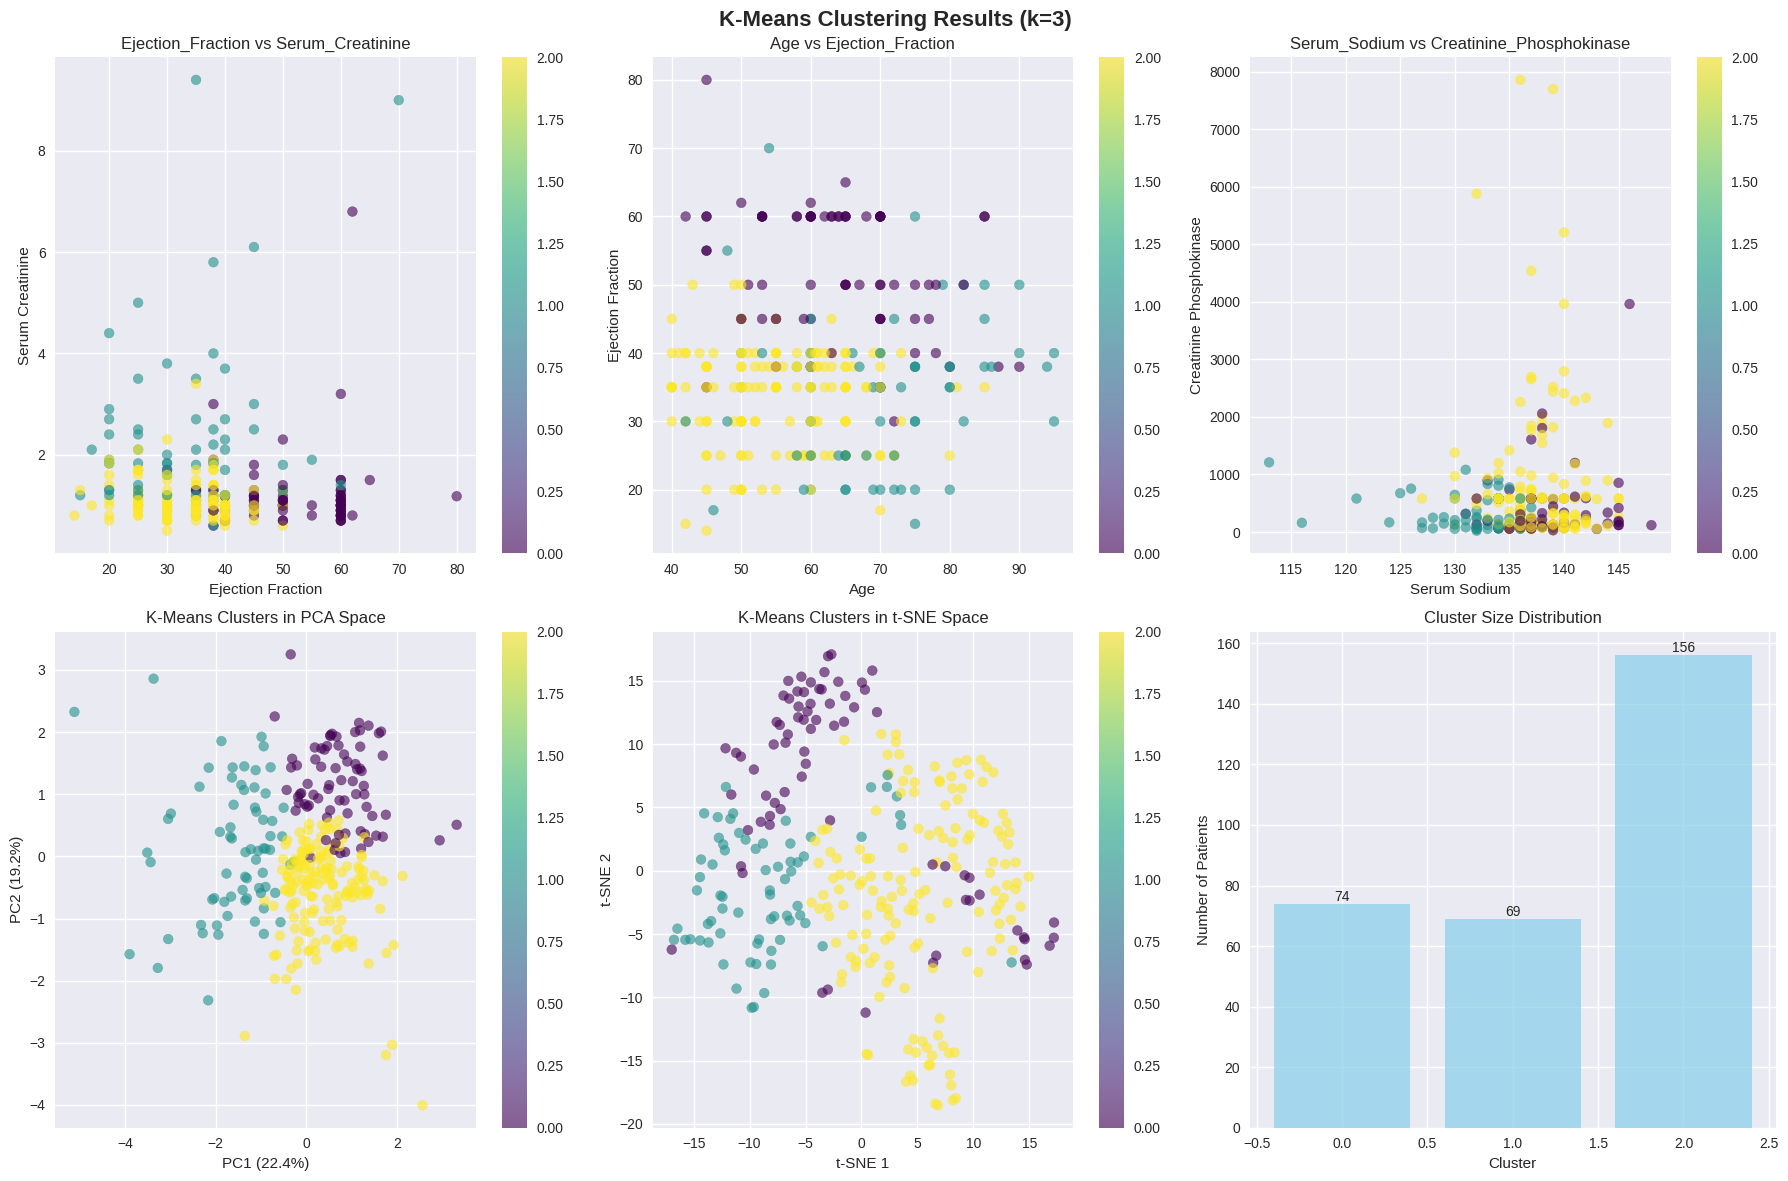

In [9]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

sil_score = silhouette_score(X_scaled, kmeans_labels)
cal_score = calinski_harabasz_score(X_scaled, kmeans_labels)
db_score = davies_bouldin_score(X_scaled, kmeans_labels)

print(f"K-Means Clustering Results (k={optimal_k}):")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Calinski-Harabasz Score: {cal_score:.3f}")
print(f"Davies-Bouldin Score: {db_score:.3f}")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'K-Means Clustering Results (k={optimal_k})', fontsize=16, fontweight='bold')
feature_pairs = [('ejection_fraction', 'serum_creatinine'),
                ('age', 'ejection_fraction'),
                ('serum_sodium', 'creatinine_phosphokinase')]

for i, (feat1, feat2) in enumerate(feature_pairs):
    scatter = axes[0, i].scatter(df[feat1], df[feat2], c=kmeans_labels,
                                cmap='viridis', alpha=0.6, s=50)
    axes[0, i].set_xlabel(feat1.replace('_', ' ').title())
    axes[0, i].set_ylabel(feat2.replace('_', ' ').title())
    axes[0, i].set_title(f'{feat1.title()} vs {feat2.title()}')
    plt.colorbar(scatter, ax=axes[0, i])
scatter = axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels,
                            cmap='viridis', alpha=0.6, s=50)
axes[1, 0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1, 0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1, 0].set_title('K-Means Clusters in PCA Space')
plt.colorbar(scatter, ax=axes[1, 0])

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
scatter = axes[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels,
                            cmap='viridis', alpha=0.6, s=50)
axes[1, 1].set_xlabel('t-SNE 1')
axes[1, 1].set_ylabel('t-SNE 2')
axes[1, 1].set_title('K-Means Clusters in t-SNE Space')
plt.colorbar(scatter, ax=axes[1, 1])

cluster_counts = np.bincount(kmeans_labels)
axes[1, 2].bar(range(optimal_k), cluster_counts, color='skyblue', alpha=0.7)
axes[1, 2].set_xlabel('Cluster')
axes[1, 2].set_ylabel('Number of Patients')
axes[1, 2].set_title('Cluster Size Distribution')
for i, count in enumerate(cluster_counts):
    axes[1, 2].text(i, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()

# Hierarchical Clustering

Performing Hierarchical Clustering Analysis...


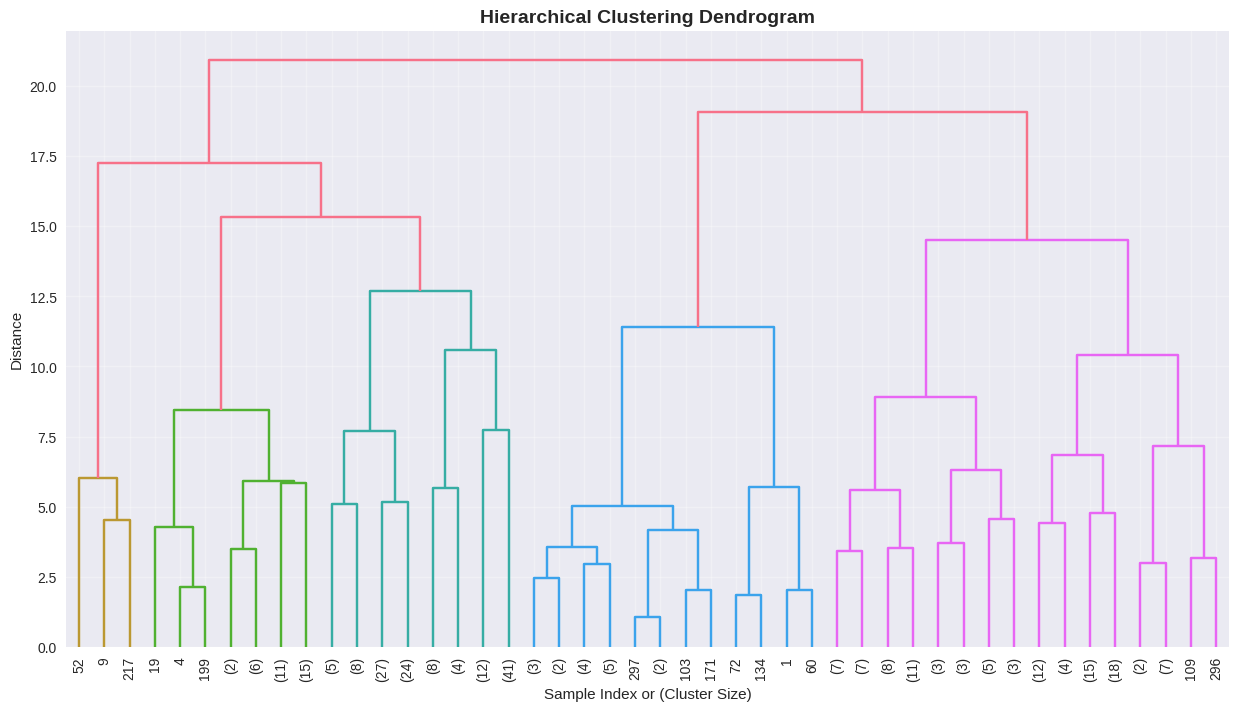

Hierarchical Clustering Results:
   n_clusters=2: Silhouette=0.142, Calinski=41.328, Davies-Bouldin=2.340
   n_clusters=3: Silhouette=0.158, Calinski=42.666, Davies-Bouldin=1.817
   n_clusters=4: Silhouette=0.168, Calinski=43.516, Davies-Bouldin=1.491
   n_clusters=5: Silhouette=0.159, Calinski=43.574, Davies-Bouldin=1.494

 Best hierarchical clustering: k=4


In [10]:
print("Performing Hierarchical Clustering Analysis...")

plt.figure(figsize=(15, 8))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=5,
           leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True, alpha=0.3)
plt.show()
hc_results = {}
for n_clusters in [2, 3, 4, 5]:
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    hc_labels = hc.fit_predict(X_scaled)

    sil_score = silhouette_score(X_scaled, hc_labels)
    cal_score = calinski_harabasz_score(X_scaled, hc_labels)
    db_score = davies_bouldin_score(X_scaled, hc_labels)

    hc_results[n_clusters] = {
        'labels': hc_labels,
        'silhouette': sil_score,
        'calinski': cal_score,
        'davies_bouldin': db_score
    }

print("Hierarchical Clustering Results:")
for n_clusters, results in hc_results.items():
    print(f"   n_clusters={n_clusters}: Silhouette={results['silhouette']:.3f}, "
          f"Calinski={results['calinski']:.3f}, Davies-Bouldin={results['davies_bouldin']:.3f}")

best_hc_k = max(hc_results.keys(), key=lambda k: hc_results[k]['silhouette'])
best_hc_labels = hc_results[best_hc_k]['labels']

print(f"\n Best hierarchical clustering: k={best_hc_k}")

# DBSCAN Clustering

In [11]:
def evaluate_dbscan(X, eps_values, min_samples_values):
    """Evaluate DBSCAN with different parameter combinations"""
    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)

            if n_clusters > 1:
                try:
                    sil_score = silhouette_score(X, labels)
                except:
                    sil_score = -1
            else:
                sil_score = -1

            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'silhouette': sil_score,
                'labels': labels
            })

    return results
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
min_samples_values = [3, 5, 7, 10]

dbscan_results = evaluate_dbscan(X_scaled, eps_values, min_samples_values)

dbscan_df = pd.DataFrame([{k: v for k, v in result.items() if k != 'labels'}
                         for result in dbscan_results])

print("DBSCAN Parameter Evaluation Results:")
print(dbscan_df.pivot_table(index='eps', columns='min_samples',
                           values='n_clusters', aggfunc='first'))

valid_results = [r for r in dbscan_results if r['n_clusters'] > 1 and r['silhouette'] > 0]
if valid_results:
    best_dbscan = max(valid_results, key=lambda x: x['silhouette'])
    print(f"\n Best DBSCAN parameters:")
    print(f"   eps={best_dbscan['eps']}, min_samples={best_dbscan['min_samples']}")
    print(f"   n_clusters={best_dbscan['n_clusters']}, silhouette={best_dbscan['silhouette']:.3f}")

    best_dbscan_labels = best_dbscan['labels']
else:
    print(" No valid DBSCAN clustering found with given parameters")
    best_dbscan_labels = None

DBSCAN Parameter Evaluation Results:
min_samples  3   5   7   10
eps                        
0.3           0   0   0   0
0.4           2   0   0   0
0.5           5   0   0   0
0.6          12   0   0   0
0.7          14   7   1   0
0.8           6   5   4   2
 No valid DBSCAN clustering found with given parameters


# Comprehensive Clustering Comparison

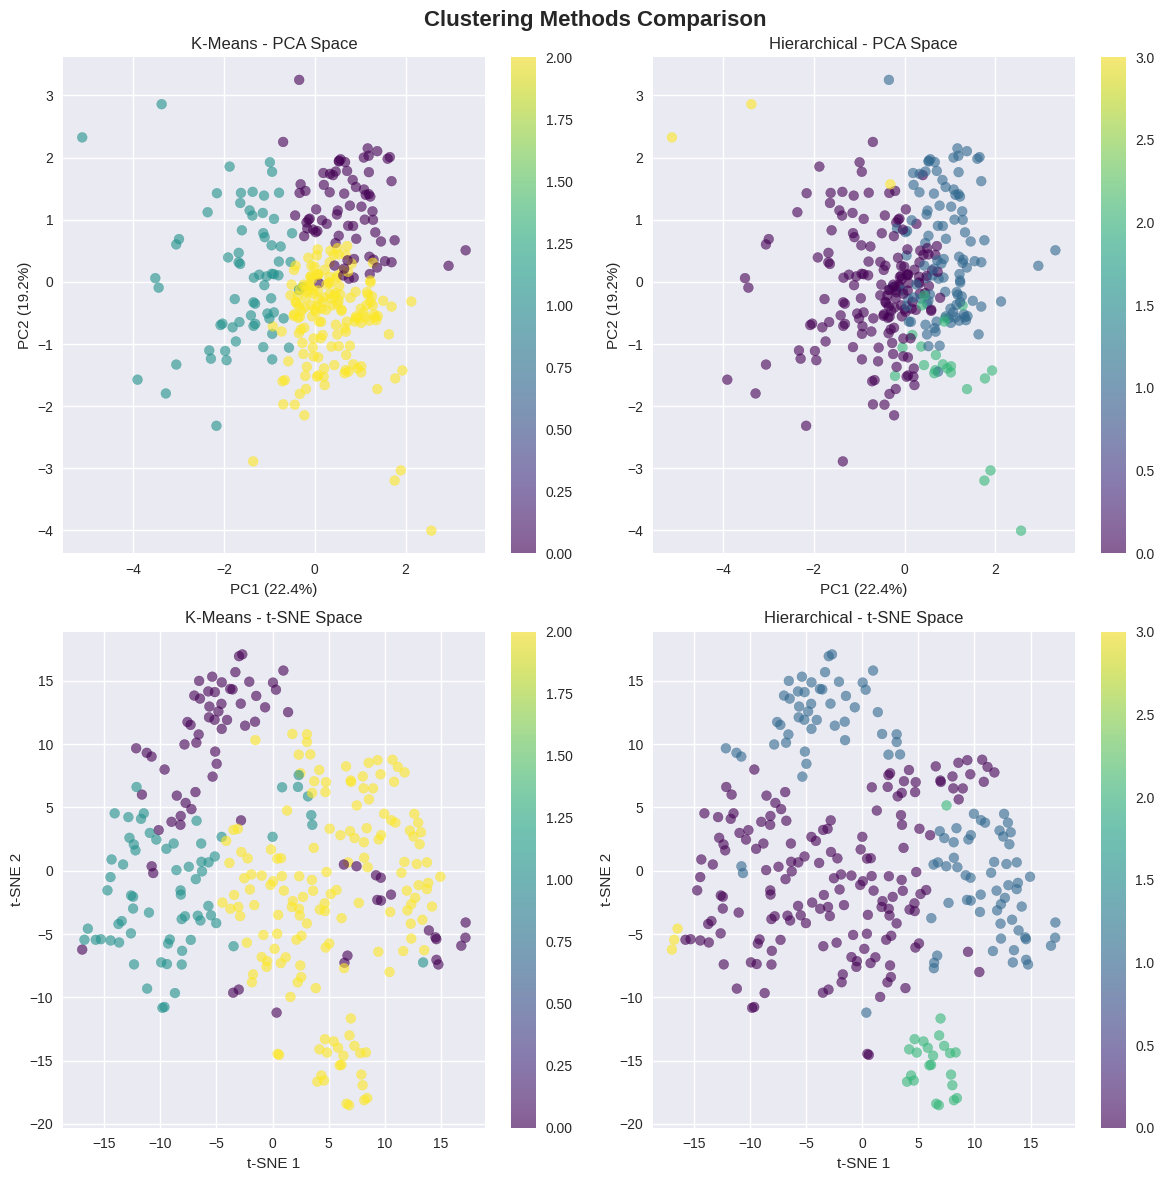

Clustering Performance Comparison:
      Method  N_Clusters Silhouette Calinski-Harabasz Davies-Bouldin
     K-Means           3      0.165            45.329          1.867
Hierarchical           4      0.168            43.516          1.491


In [12]:
clustering_methods = {
    'K-Means': kmeans_labels,
    'Hierarchical': best_hc_labels,
}

if best_dbscan_labels is not None:
    clustering_methods['DBSCAN'] = best_dbscan_labels

n_methods = len(clustering_methods)
fig, axes = plt.subplots(2, n_methods, figsize=(6*n_methods, 12))
if n_methods == 1:
    axes = axes.reshape(-1, 1)

fig.suptitle('Clustering Methods Comparison', fontsize=16, fontweight='bold')

for i, (method_name, labels) in enumerate(clustering_methods.items()):
    scatter = axes[0, i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels,
                                cmap='viridis', alpha=0.6, s=50)
    axes[0, i].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    axes[0, i].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    axes[0, i].set_title(f'{method_name} - PCA Space')
    plt.colorbar(scatter, ax=axes[0, i])
    scatter = axes[1, i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels,
                                cmap='viridis', alpha=0.6, s=50)
    axes[1, i].set_xlabel('t-SNE 1')
    axes[1, i].set_ylabel('t-SNE 2')
    axes[1, i].set_title(f'{method_name} - t-SNE Space')
    plt.colorbar(scatter, ax=axes[1, i])

plt.tight_layout()
plt.show()

print("Clustering Performance Comparison:")
comparison_data = []
for method_name, labels in clustering_methods.items():
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        sil_score = silhouette_score(X_scaled, labels)
        cal_score = calinski_harabasz_score(X_scaled, labels)
        db_score = davies_bouldin_score(X_scaled, labels)
    else:
        sil_score = cal_score = db_score = 'N/A'

    comparison_data.append({
        'Method': method_name,
        'N_Clusters': n_clusters,
        'Silhouette': f"{sil_score:.3f}" if sil_score != 'N/A' else 'N/A',
        'Calinski-Harabasz': f"{cal_score:.3f}" if cal_score != 'N/A' else 'N/A',
        'Davies-Bouldin': f"{db_score:.3f}" if db_score != 'N/A' else 'N/A'
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Clinical Insights and Cluster Analysis


 K-Means - Clinical Cluster Analysis:
Cluster Statistics:
           age        ejection_fraction        serum_creatinine        \
          mean    std              mean    std             mean   std   
Cluster                                                                 
0        63.49  11.06             52.26   9.36             1.22  0.79   
1        69.62  12.02             33.99  10.69             2.26  1.65   
2        55.69   9.31             33.17   7.08             1.09  0.36   

        serum_sodium       DEATH_EVENT             sex  
                mean   std       count sum  mean  mean  
Cluster                                                 
0             138.55  3.58          74  17  0.23  0.61  
1             131.97  4.46          69  42  0.61  0.67  
2             137.77  3.16         156  37  0.24  0.66  

 Survival Analysis by Cluster:
         count  sum      mean  survival_rate
Cluster                                     
0           74   17  0.229730       0.

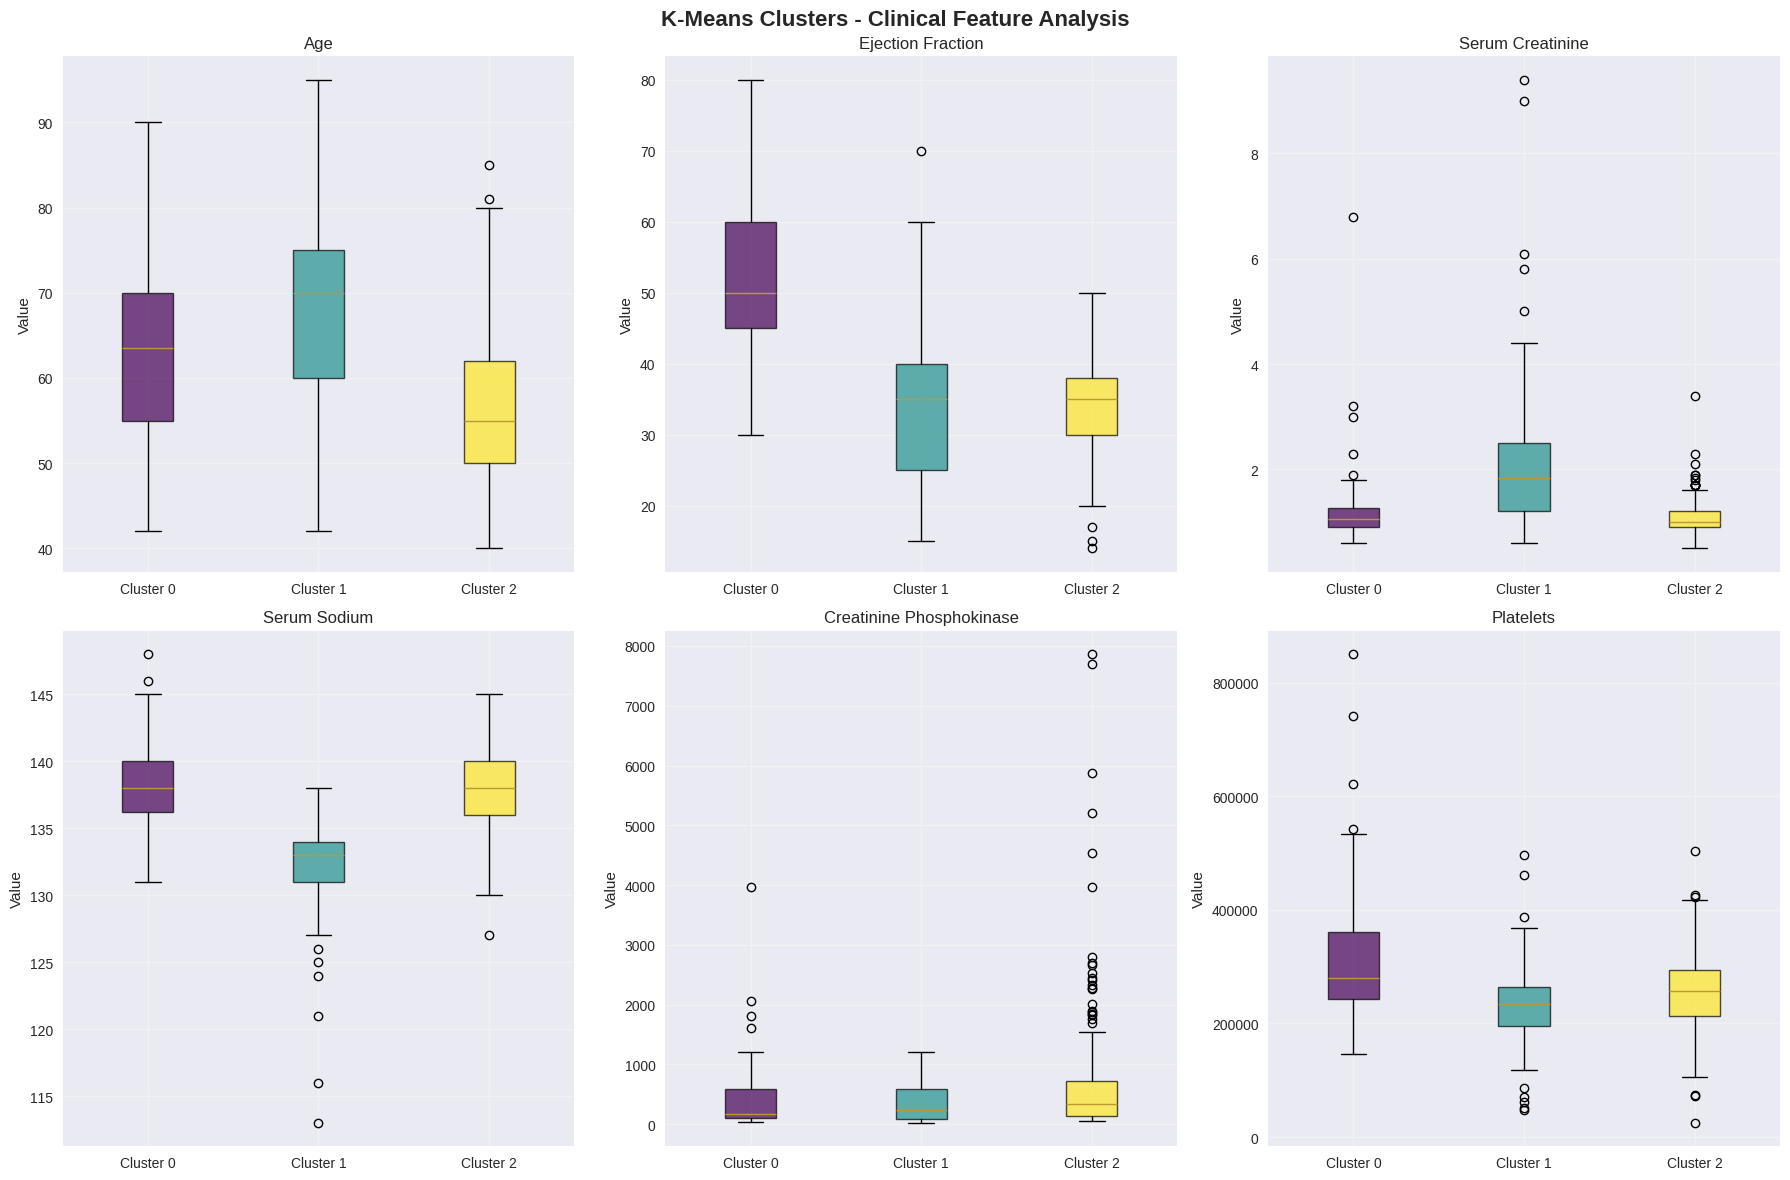

In [13]:
def analyze_clusters(df, labels, method_name):
    """Analyze cluster characteristics"""
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = labels

    print(f"\n {method_name} - Clinical Cluster Analysis:")
    print("="*50)

    cluster_stats = df_with_clusters.groupby('Cluster').agg({
        'age': ['mean', 'std'],
        'ejection_fraction': ['mean', 'std'],
        'serum_creatinine': ['mean', 'std'],
        'serum_sodium': ['mean', 'std'],
        'DEATH_EVENT': ['count', 'sum', 'mean'],
        'sex': 'mean'
    }).round(2)

    print("Cluster Statistics:")
    print(cluster_stats)

    survival_by_cluster = df_with_clusters.groupby('Cluster')['DEATH_EVENT'].agg(['count', 'sum', 'mean'])
    survival_by_cluster['survival_rate'] = 1 - survival_by_cluster['mean']

    print(f"\n Survival Analysis by Cluster:")
    print(survival_by_cluster)

    return df_with_clusters

kmeans_analysis = analyze_clusters(df, kmeans_labels, "K-Means")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('K-Means Clusters - Clinical Feature Analysis', fontsize=16, fontweight='bold')

clinical_features = ['age', 'ejection_fraction', 'serum_creatinine',
                    'serum_sodium', 'creatinine_phosphokinase', 'platelets']

for i, feature in enumerate(clinical_features):
    ax = axes[i//3, i%3]

    cluster_data = [kmeans_analysis[kmeans_analysis['Cluster']==c][feature].values
                   for c in sorted(kmeans_analysis['Cluster'].unique())]

    box_plot = ax.boxplot(cluster_data, patch_artist=True,
                         labels=[f'Cluster {i}' for i in range(len(cluster_data))])

    colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_data)))
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax.set_title(f'{feature.replace("_", " ").title()}')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Risk Stratification Analysis

Risk Stratification Analysis:
Risk Categories by Cluster:
         DEATH_EVENT     age  ejection_fraction  serum_creatinine  \
Cluster                                                             
0              0.230  63.486             52.257             1.219   
1              0.609  69.623             33.986             2.261   
2              0.237  55.688             33.173             1.093   

        risk_category  
Cluster                
0         Medium Risk  
1           High Risk  
2         Medium Risk  


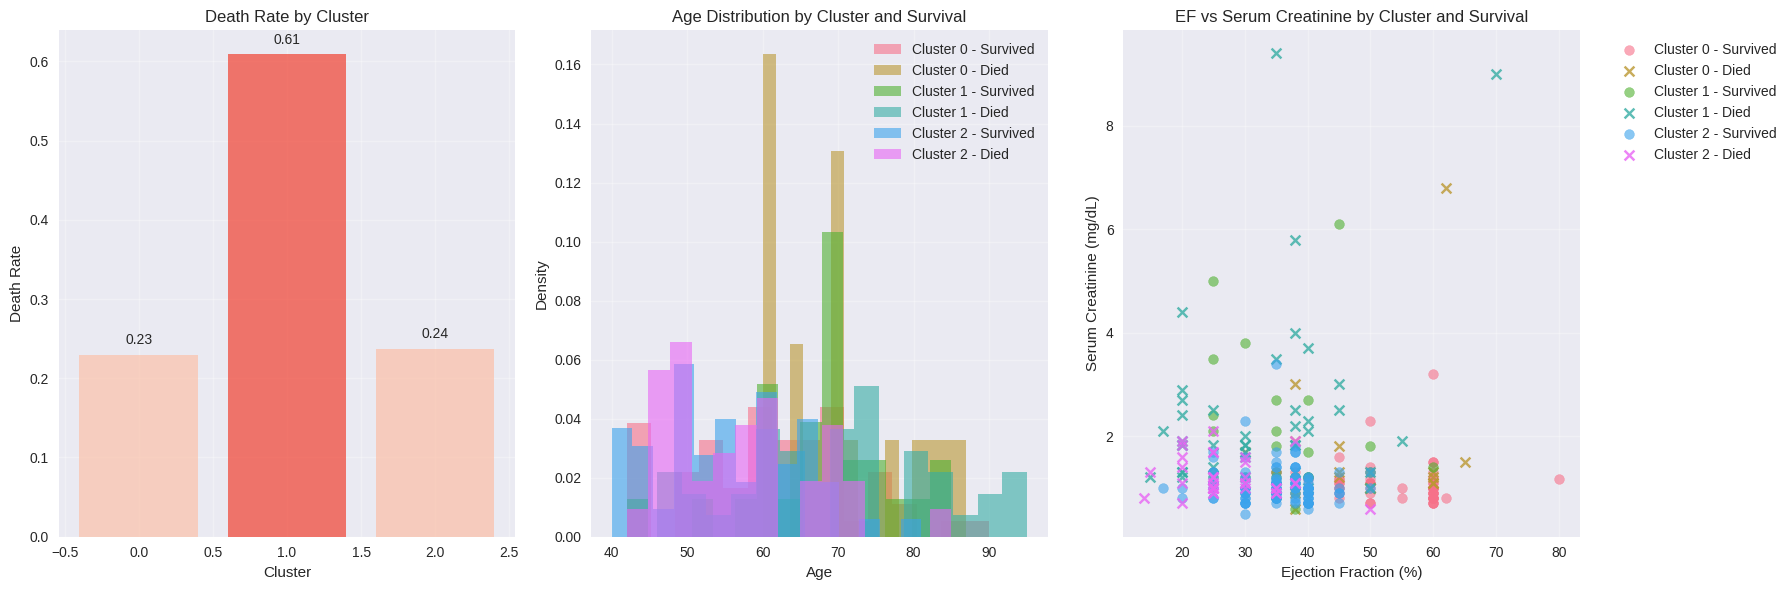

In [14]:
def risk_stratification_analysis(df_with_clusters):
    """Perform risk stratification analysis"""

    print("Risk Stratification Analysis:")
    print("="*40)

    risk_analysis = df_with_clusters.groupby('Cluster').agg({
        'DEATH_EVENT': 'mean',
        'age': 'mean',
        'ejection_fraction': 'mean',
        'serum_creatinine': 'mean'
    }).round(3)

    risk_analysis['risk_category'] = pd.cut(risk_analysis['DEATH_EVENT'],
                                           bins=[0, 0.2, 0.4, 1.0],
                                           labels=['Low Risk', 'Medium Risk', 'High Risk'])

    print("Risk Categories by Cluster:")
    print(risk_analysis)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    death_rates = df_with_clusters.groupby('Cluster')['DEATH_EVENT'].mean()
    bars = axes[0].bar(death_rates.index, death_rates.values,
                      color=plt.cm.Reds(death_rates.values), alpha=0.7)
    axes[0].set_xlabel('Cluster')
    axes[0].set_ylabel('Death Rate')
    axes[0].set_title('Death Rate by Cluster')
    axes[0].grid(True, alpha=0.3)

    for bar, rate in zip(bars, death_rates.values):
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{rate:.2f}', ha='center', va='bottom')

    for cluster in sorted(df_with_clusters['Cluster'].unique()):
        cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]
        survived = cluster_data[cluster_data['DEATH_EVENT'] == 0]['age']
        died = cluster_data[cluster_data['DEATH_EVENT'] == 1]['age']

        axes[1].hist(survived, alpha=0.6, label=f'Cluster {cluster} - Survived',
                    bins=15, density=True)
        axes[1].hist(died, alpha=0.6, label=f'Cluster {cluster} - Died',
                    bins=15, density=True, linestyle='--')

    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('Density')
    axes[1].set_title('Age Distribution by Cluster and Survival')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    for cluster in sorted(df_with_clusters['Cluster'].unique()):
        cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]

        survived = cluster_data[cluster_data['DEATH_EVENT'] == 0]
        axes[2].scatter(survived['ejection_fraction'], survived['serum_creatinine'],
                       label=f'Cluster {cluster} - Survived', alpha=0.6, s=50,
                       marker='o')

        died = cluster_data[cluster_data['DEATH_EVENT'] == 1]
        axes[2].scatter(died['ejection_fraction'], died['serum_creatinine'],
                       label=f'Cluster {cluster} - Died', alpha=0.8, s=50,
                       marker='x')

    axes[2].set_xlabel('Ejection Fraction (%)')
    axes[2].set_ylabel('Serum Creatinine (mg/dL)')
    axes[2].set_title('EF vs Serum Creatinine by Cluster and Survival')
    axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return risk_analysis

risk_results = risk_stratification_analysis(kmeans_analysis)

# Feature Importance and Clinical Interpretation

Feature Importance Analysis:
Feature Variation Across Clusters (Coefficient of Variation):
   Creatinine Phosphokinase: 0.479
   Serum Creatinine: 0.421
   Ejection Fraction: 0.271
   Platelets: 0.159
   Age: 0.111
   Serum Sodium: 0.026


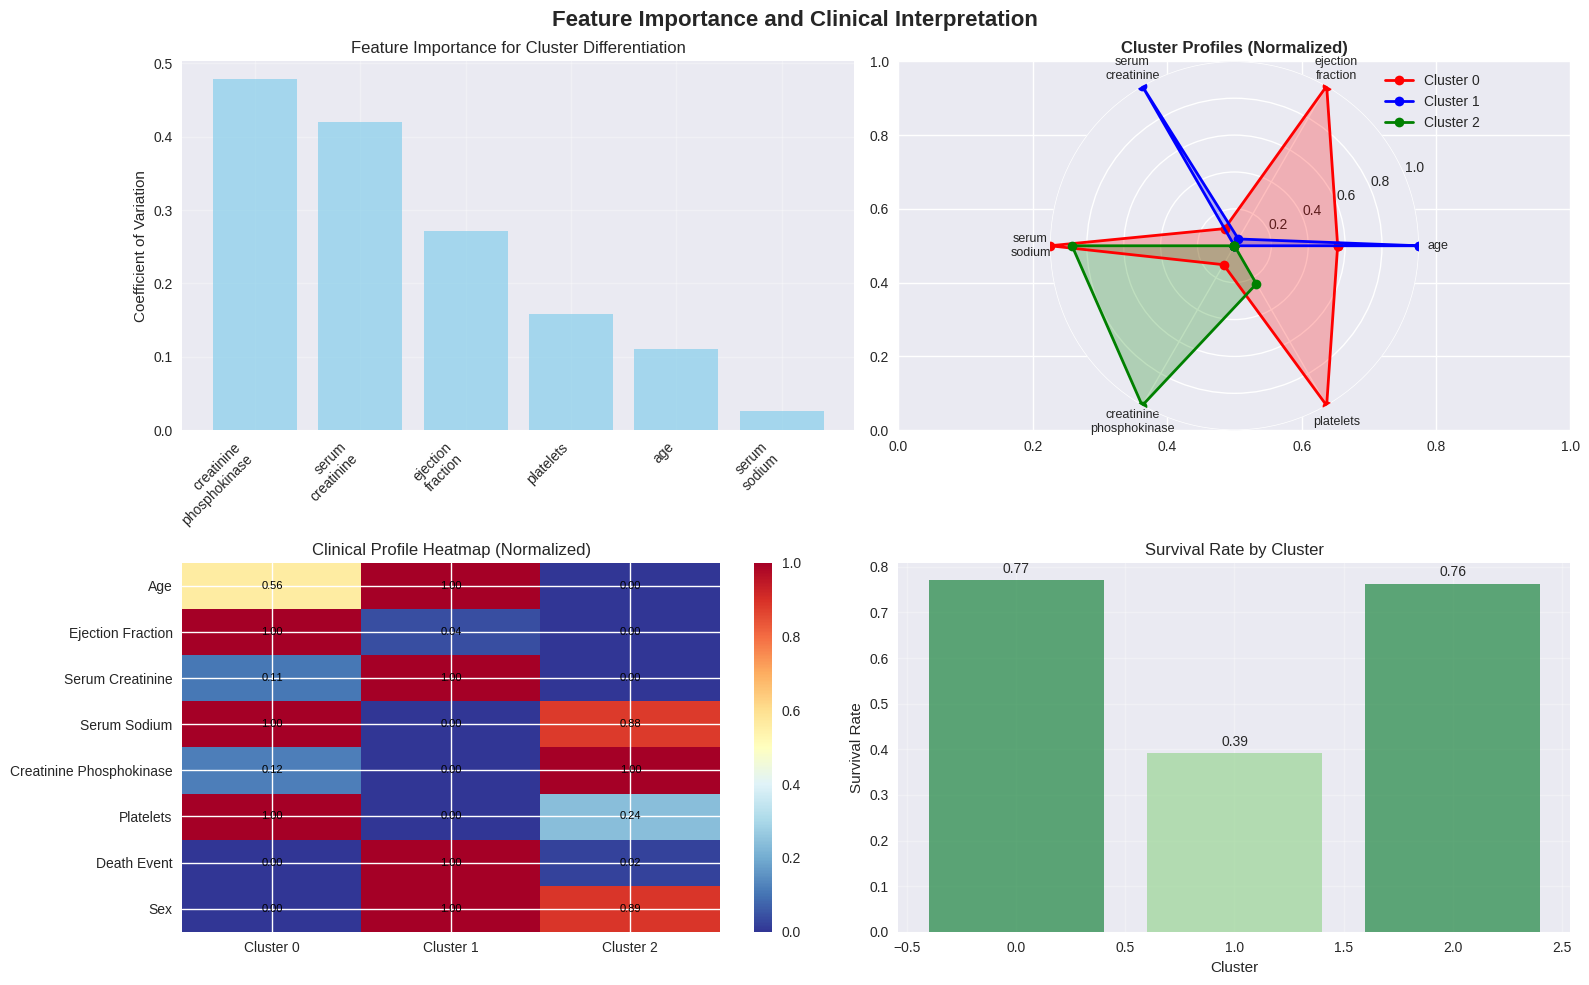

In [15]:
def feature_importance_analysis(df_with_clusters):
    """Analyze feature importance for cluster differentiation"""

    print("Feature Importance Analysis:")
    print("="*35)

    feature_means = df_with_clusters.groupby('Cluster')[clustering_features].mean()

    feature_variation = feature_means.std() / feature_means.mean()
    feature_variation = feature_variation.sort_values(ascending=False)

    print("Feature Variation Across Clusters (Coefficient of Variation):")
    for feature, cv in feature_variation.items():
        print(f"   {feature.replace('_', ' ').title()}: {cv:.3f}")

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Feature Importance and Clinical Interpretation', fontsize=16, fontweight='bold')

    axes[0,0].bar(range(len(feature_variation)), feature_variation.values,
                  color='skyblue', alpha=0.7)
    axes[0,0].set_xticks(range(len(feature_variation)))
    axes[0,0].set_xticklabels([f.replace('_', '\n') for f in feature_variation.index],
                             rotation=45, ha='right')
    axes[0,0].set_ylabel('Coefficient of Variation')
    axes[0,0].set_title('Feature Importance for Cluster Differentiation')
    axes[0,0].grid(True, alpha=0.3)

    from math import pi

    normalized_means = feature_means.copy()
    for col in normalized_means.columns:
        col_min = normalized_means[col].min()
        col_max = normalized_means[col].max()
        normalized_means[col] = (normalized_means[col] - col_min) / (col_max - col_min)

    categories = [f.replace('_', '\n') for f in clustering_features]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(2, 2, 2, projection='polar')

    colors = ['red', 'blue', 'green', 'orange', 'purple']
    for i, cluster in enumerate(sorted(normalized_means.index)):
        values = normalized_means.loc[cluster].values.tolist()
        values += values[:1]

        ax.plot(angles, values, 'o-', linewidth=2,
               label=f'Cluster {cluster}', color=colors[i % len(colors)])
        ax.fill(angles, values, alpha=0.25, color=colors[i % len(colors)])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=9)
    ax.set_ylim(0, 1)
    ax.set_title('Cluster Profiles (Normalized)', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

    clinical_interpretation = df_with_clusters.groupby('Cluster').agg({
        'age': 'mean',
        'ejection_fraction': 'mean',
        'serum_creatinine': 'mean',
        'serum_sodium': 'mean',
        'creatinine_phosphokinase': 'mean',
        'platelets': 'mean',
        'DEATH_EVENT': 'mean',
        'sex': 'mean'
    })

    normalized_interp = clinical_interpretation.copy()
    for col in normalized_interp.columns:
        col_min = normalized_interp[col].min()
        col_max = normalized_interp[col].max()
        if col_max != col_min:
            normalized_interp[col] = (normalized_interp[col] - col_min) / (col_max - col_min)

    im = axes[1,0].imshow(normalized_interp.T, cmap='RdYlBu_r', aspect='auto')
    axes[1,0].set_xticks(range(len(normalized_interp)))
    axes[1,0].set_xticklabels([f'Cluster {i}' for i in normalized_interp.index])
    axes[1,0].set_yticks(range(len(normalized_interp.columns)))
    axes[1,0].set_yticklabels([col.replace('_', ' ').title() for col in normalized_interp.columns])
    axes[1,0].set_title('Clinical Profile Heatmap (Normalized)')

    for i in range(len(normalized_interp)):
        for j in range(len(normalized_interp.columns)):
            text = axes[1,0].text(i, j, f'{normalized_interp.iloc[i, j]:.2f}',
                                ha="center", va="center", color="black", fontsize=8)

    plt.colorbar(im, ax=axes[1,0])

    survival_rates = 1 - df_with_clusters.groupby('Cluster')['DEATH_EVENT'].mean()
    bars = axes[1,1].bar(survival_rates.index, survival_rates.values,
                        color=plt.cm.Greens(survival_rates.values), alpha=0.7)
    axes[1,1].set_xlabel('Cluster')
    axes[1,1].set_ylabel('Survival Rate')
    axes[1,1].set_title('Survival Rate by Cluster')
    axes[1,1].grid(True, alpha=0.3)

    for bar, rate in zip(bars, survival_rates.values):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                      f'{rate:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    return feature_variation, clinical_interpretation
feature_importance, clinical_profiles = feature_importance_analysis(kmeans_analysis)

# Clinical Recommendations and Summary

Clinical Recommendations by Cluster:

 Cluster 0 - Clinical Profile:
Patient Count: 74
Death Rate: 23.0%
Average Age: 63.5 years
Average EF: 52.3%
Average Creatinine: 1.22 mg/dL
Average Sodium: 138.6 mEq/L
Recommendations:
MEDIUM RISK - Regular follow-up needed
Outpatient management with close monitoring

 Cluster 1 - Clinical Profile:
Patient Count: 69
Death Rate: 60.9%
Average Age: 69.6 years
Average EF: 34.0%
Average Creatinine: 2.26 mg/dL
Average Sodium: 132.0 mEq/L
Recommendations:
HIGH RISK - Intensive monitoring required
Consider hospitalization for unstable patients
Optimize heart failure medications
Reduced EF - ACE inhibitors/ARBs, beta-blockers
Elevated creatinine - Monitor kidney function
Consider diuretic adjustment

 Cluster 2 - Clinical Profile:
Patient Count: 156
Death Rate: 23.7%
Average Age: 55.7 years
Average EF: 33.2%
Average Creatinine: 1.09 mg/dL
Average Sodium: 137.8 mEq/L
Recommendations:
MEDIUM RISK - Regular follow-up needed
Outpatient management with close mo

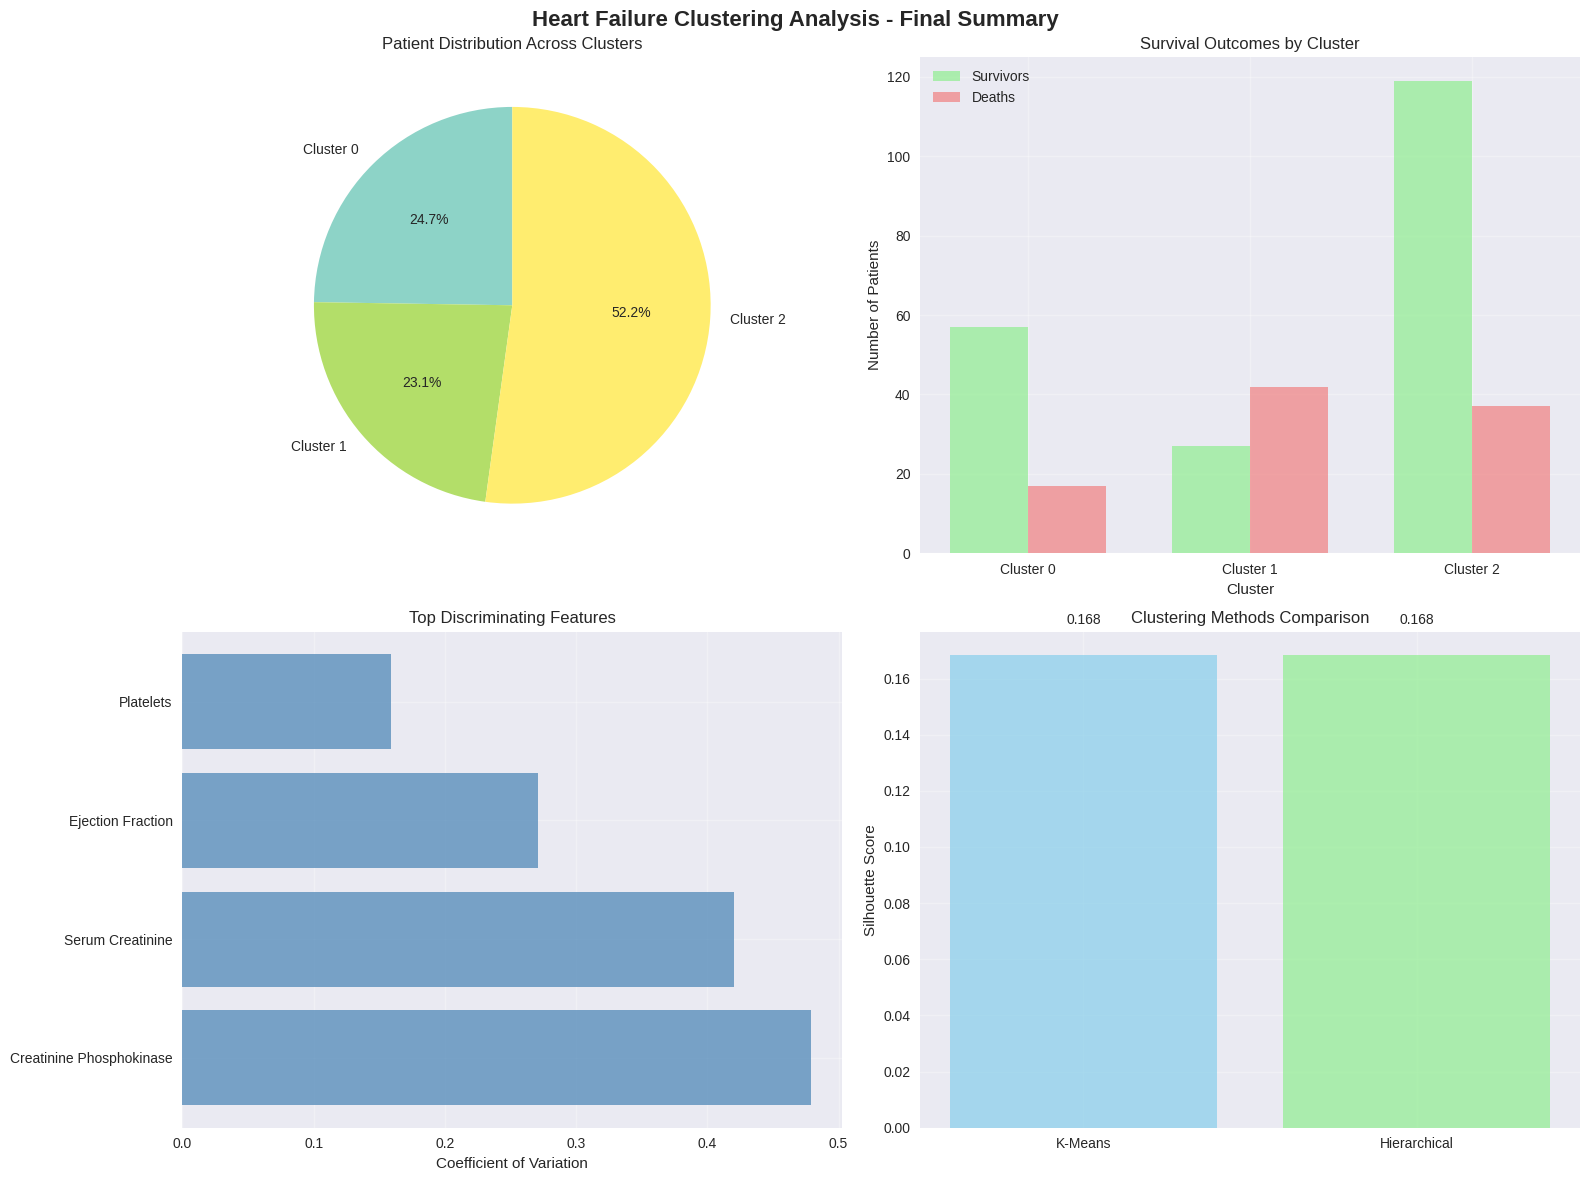


HEART FAILURE CLUSTERING ANALYSIS - EXECUTIVE SUMMARY
Total Patients Analyzed: 299
Clustering Method Used: K-Means (k=3)
Silhouette Score: 0.168
Most Discriminating Features: creatinine_phosphokinase, serum_creatinine, ejection_fraction
Highest Risk Cluster: 1 (Death Rate: 60.9%)
Lowest Risk Cluster: 0 (Death Rate: 23.0%)


In [16]:
def generate_clinical_recommendations(df_with_clusters, clinical_profiles):
    """Generate clinical recommendations for each cluster"""

    print("Clinical Recommendations by Cluster:")
    print("="*45)

    recommendations = {}

    for cluster in sorted(clinical_profiles.index):
        cluster_data = clinical_profiles.loc[cluster]
        cluster_patients = df_with_clusters[df_with_clusters['Cluster'] == cluster]

        print(f"\n Cluster {cluster} - Clinical Profile:")
        print(f"Patient Count: {len(cluster_patients)}")
        print(f"Death Rate: {cluster_data['DEATH_EVENT']:.1%}")
        print(f"Average Age: {cluster_data['age']:.1f} years")
        print(f"Average EF: {cluster_data['ejection_fraction']:.1f}%")
        print(f"Average Creatinine: {cluster_data['serum_creatinine']:.2f} mg/dL")
        print(f"Average Sodium: {cluster_data['serum_sodium']:.1f} mEq/L")

        death_rate = cluster_data['DEATH_EVENT']
        ef = cluster_data['ejection_fraction']
        creatinine = cluster_data['serum_creatinine']
        age = cluster_data['age']

        recs = []

        if death_rate > 0.4:
            recs.append("HIGH RISK - Intensive monitoring required")
            recs.append("Consider hospitalization for unstable patients")
            recs.append("Optimize heart failure medications")
        elif death_rate > 0.2:
            recs.append("MEDIUM RISK - Regular follow-up needed")
            recs.append("Outpatient management with close monitoring")
        else:
            recs.append("LOW RISK - Standard care protocol")
            recs.append("Routine follow-up appointments")

        if ef < 40:
            recs.append("Reduced EF - ACE inhibitors/ARBs, beta-blockers")

        if creatinine > 1.5:
            recs.append("Elevated creatinine - Monitor kidney function")
            recs.append("Consider diuretic adjustment")

        if age > 70:
            recs.append("Elderly patient - Consider frailty assessment")

        recommendations[cluster] = recs

        print("Recommendations:")
        for rec in recs:
            print(f"{rec}")

    return recommendations

clinical_recommendations = generate_clinical_recommendations(kmeans_analysis, clinical_profiles)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Heart Failure Clustering Analysis - Final Summary', fontsize=16, fontweight='bold')

cluster_counts = kmeans_analysis['Cluster'].value_counts().sort_index()
colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_counts)))
wedges, texts, autotexts = axes[0,0].pie(cluster_counts.values,
                                        labels=[f'Cluster {i}' for i in cluster_counts.index],
                                        autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,0].set_title('Patient Distribution Across Clusters')

risk_summary = kmeans_analysis.groupby('Cluster')['DEATH_EVENT'].agg(['count', 'sum', 'mean'])
risk_summary['survivors'] = risk_summary['count'] - risk_summary['sum']

x = np.arange(len(risk_summary))
width = 0.35

bars1 = axes[0,1].bar(x - width/2, risk_summary['survivors'], width,
                     label='Survivors', color='lightgreen', alpha=0.7)
bars2 = axes[0,1].bar(x + width/2, risk_summary['sum'], width,
                     label='Deaths', color='lightcoral', alpha=0.7)

axes[0,1].set_xlabel('Cluster')
axes[0,1].set_ylabel('Number of Patients')
axes[0,1].set_title('Survival Outcomes by Cluster')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels([f'Cluster {i}' for i in risk_summary.index])
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

top_features = feature_importance.head(4)
axes[1,0].barh(range(len(top_features)), top_features.values, color='steelblue', alpha=0.7)
axes[1,0].set_yticks(range(len(top_features)))
axes[1,0].set_yticklabels([f.replace('_', ' ').title() for f in top_features.index])
axes[1,0].set_xlabel('Coefficient of Variation')
axes[1,0].set_title('Top Discriminating Features')
axes[1,0].grid(True, alpha=0.3)

metrics_data = {
    'K-Means': [sil_score, cal_score, db_score],
    'Hierarchical': [hc_results[best_hc_k]['silhouette'],
                    hc_results[best_hc_k]['calinski'],
                    hc_results[best_hc_k]['davies_bouldin']]
}

if best_dbscan_labels is not None:
    metrics_data['DBSCAN'] = [best_dbscan['silhouette'],
                             calinski_harabasz_score(X_scaled, best_dbscan_labels),
                             davies_bouldin_score(X_scaled, best_dbscan_labels)]

methods = list(metrics_data.keys())
silhouette_scores = [metrics_data[method][0] for method in methods]

axes[1,1].bar(methods, silhouette_scores, color=['skyblue', 'lightgreen', 'lightsalmon'][:len(methods)],
             alpha=0.7)
axes[1,1].set_ylabel('Silhouette Score')
axes[1,1].set_title('Clustering Methods Comparison')
axes[1,1].grid(True, alpha=0.3)

for i, score in enumerate(silhouette_scores):
    axes[1,1].text(i, score + 0.01, f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("HEART FAILURE CLUSTERING ANALYSIS - EXECUTIVE SUMMARY")
print("="*60)
print(f"Total Patients Analyzed: {len(df)}")
print(f"Clustering Method Used: K-Means (k={optimal_k})")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Most Discriminating Features: {', '.join(feature_importance.head(3).index)}")
print(f"Highest Risk Cluster: {clinical_profiles['DEATH_EVENT'].idxmax()} (Death Rate: {clinical_profiles['DEATH_EVENT'].max():.1%})")
print(f"Lowest Risk Cluster: {clinical_profiles['DEATH_EVENT'].idxmin()} (Death Rate: {clinical_profiles['DEATH_EVENT'].min():.1%})")

# Export Results and Data

In [17]:
def export_results(df_with_clusters, clinical_profiles, recommendations):
    """Export clustering results to CSV files"""
    print("Exporting Results...")
    export_df = df_with_clusters.copy()
    export_df.to_csv('heart_failure_clustered_patients.csv', index=False)
    print("Patient data with clusters exported to 'heart_failure_clustered_patients.csv'")

    clinical_profiles.to_csv('heart_failure_cluster_profiles.csv')
    print("Cluster profiles exported to 'heart_failure_cluster_profiles.csv'")
    rec_df = pd.DataFrame([(cluster, rec) for cluster, recs in recommendations.items()
                          for rec in recs], columns=['Cluster', 'Recommendation'])
    rec_df.to_csv('heart_failure_cluster_recommendations.csv', index=False)
    print("Clinical recommendations exported to 'heart_failure_cluster_recommendations.csv'")

    summary_stats = {
        'Total_Patients': len(df_with_clusters),
        'Number_of_Clusters': len(clinical_profiles),
        'Overall_Death_Rate': df_with_clusters['DEATH_EVENT'].mean(),
        'Silhouette_Score': sil_score,
        'Calinski_Harabasz_Score': cal_score,
        'Davies_Bouldin_Score': db_score
    }

    summary_df = pd.DataFrame([summary_stats])
    summary_df.to_csv('heart_failure_clustering_summary.csv', index=False)
    print("Summary statistics exported to 'heart_failure_clustering_summary.csv'")

    return export_df

final_export = export_results(kmeans_analysis, clinical_profiles, clinical_recommendations)

print("\n Heart Failure Clustering Analysis Complete!")
print("All results have been exported to CSV files for further analysis.")

Exporting Results...
Patient data with clusters exported to 'heart_failure_clustered_patients.csv'
Cluster profiles exported to 'heart_failure_cluster_profiles.csv'
Clinical recommendations exported to 'heart_failure_cluster_recommendations.csv'
Summary statistics exported to 'heart_failure_clustering_summary.csv'

 Heart Failure Clustering Analysis Complete!
All results have been exported to CSV files for further analysis.


# Export as HTML Report

In [18]:
import pickle
from datetime import datetime
import base64
from io import BytesIO

def create_html_report():
    """Create comprehensive HTML report of the clustering analysis"""

    print("Creating HTML Report...")
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    html_content = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Heart Failure Clustering Analysis Report</title>
        <style>
            body {{
                font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
                margin: 0;
                padding: 20px;
                background-color: #f5f5f5;
                line-height: 1.6;
            }}
            .container {{
                max-width: 1200px;
                margin: 0 auto;
                background-color: white;
                padding: 30px;
                border-radius: 10px;
                box-shadow: 0 0 20px rgba(0,0,0,0.1);
            }}
            .header {{
                text-align: center;
                color: #2c3e50;
                border-bottom: 3px solid #3498db;
                padding-bottom: 20px;
                margin-bottom: 30px;
            }}
            .section {{
                margin: 30px 0;
                padding: 20px;
                background-color: #f8f9fa;
                border-radius: 8px;
                border-left: 4px solid #3498db;
            }}
            .metric {{
                display: inline-block;
                background-color: #e3f2fd;
                padding: 15px;
                margin: 10px;
                border-radius: 8px;
                border: 1px solid #bbdefb;
                min-width: 200px;
                text-align: center;
            }}
            .metric-value {{
                font-size: 24px;
                font-weight: bold;
                color: #1976d2;
            }}
            .metric-label {{
                font-size: 14px;
                color: #666;
                margin-top: 5px;
            }}
            .table {{
                width: 100%;
                border-collapse: collapse;
                margin: 20px 0;
                background-color: white;
                border-radius: 8px;
                overflow: hidden;
                box-shadow: 0 2px 10px rgba(0,0,0,0.1);
            }}
            .table th, .table td {{
                padding: 12px;
                text-align: left;
                border-bottom: 1px solid #ddd;
            }}
            .table th {{
                background-color: #3498db;
                color: white;
                font-weight: bold;
            }}
            .table tr:hover {{
                background-color: #f5f5f5;
            }}
            .risk-high {{ color: #e74c3c; font-weight: bold; }}
            .risk-medium {{ color: #f39c12; font-weight: bold; }}
            .risk-low {{ color: #27ae60; font-weight: bold; }}
            .recommendations {{
                background-color: #fff3cd;
                border: 1px solid #ffeaa7;
                border-radius: 8px;
                padding: 15px;
                margin: 10px 0;
            }}
            .cluster-section {{
                background-color: #ffffff;
                border: 1px solid #dee2e6;
                border-radius: 8px;
                padding: 20px;
                margin: 15px 0;
            }}
            .footer {{
                text-align: center;
                margin-top: 40px;
                padding-top: 20px;
                border-top: 1px solid #ddd;
                color: #666;
                font-size: 12px;
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <div class="header">
                <h1>Heart Failure Clustering Analysis Report</h1>
                <p>Comprehensive Clinical Data Analysis and Risk Stratification</p>
                <p><em>Generated on: {timestamp}</em></p>
            </div>
    """

    html_content += f"""
            <div class="section">
                <h2>Executive Summary</h2>
                <div class="metric">
                    <div class="metric-value">{len(df)}</div>
                    <div class="metric-label">Total Patients</div>
                </div>
                <div class="metric">
                    <div class="metric-value">{optimal_k}</div>
                    <div class="metric-label">Identified Clusters</div>
                </div>
                <div class="metric">
                    <div class="metric-value">{sil_score:.3f}</div>
                    <div class="metric-label">Silhouette Score</div>
                </div>
                <div class="metric">
                    <div class="metric-value">{df['DEATH_EVENT'].mean():.1%}</div>
                    <div class="metric-label">Overall Death Rate</div>
                </div>
            </div>
    """

    html_content += """
            <div class="section">
                <h2>Cluster Profiles and Risk Stratification</h2>
                <table class="table">
                    <thead>
                        <tr>
                            <th>Cluster</th>
                            <th>Patients</th>
                            <th>Death Rate</th>
                            <th>Risk Level</th>
                            <th>Avg Age</th>
                            <th>Avg EF (%)</th>
                            <th>Avg Creatinine</th>
                        </tr>
                    </thead>
                    <tbody>
    """

    for cluster in sorted(clinical_profiles.index):
        cluster_data = clinical_profiles.loc[cluster]
        cluster_patients = kmeans_analysis[kmeans_analysis['Cluster'] == cluster]
        death_rate = cluster_data['DEATH_EVENT']

        if death_rate > 0.4:
            risk_class = "risk-high"
            risk_level = "HIGH"
        elif death_rate > 0.2:
            risk_class = "risk-medium"
            risk_level = "MEDIUM"
        else:
            risk_class = "risk-low"
            risk_level = "LOW"

        html_content += f"""
                        <tr>
                            <td><strong>Cluster {cluster}</strong></td>
                            <td>{len(cluster_patients)}</td>
                            <td>{death_rate:.1%}</td>
                            <td class="{risk_class}">{risk_level}</td>
                            <td>{cluster_data['age']:.1f}</td>
                            <td>{cluster_data['ejection_fraction']:.1f}</td>
                            <td>{cluster_data['serum_creatinine']:.2f}</td>
                        </tr>
        """

    html_content += """
                    </tbody>
                </table>
            </div>
    """
    html_content += """
            <div class="section">
                <h2>Clinical Recommendations by Cluster</h2>
    """

    for cluster in sorted(clinical_recommendations.keys()):
        cluster_data = clinical_profiles.loc[cluster]
        death_rate = cluster_data['DEATH_EVENT']

        if death_rate > 0.4:
            risk_class = "risk-high"
        elif death_rate > 0.2:
            risk_class = "risk-medium"
        else:
            risk_class = "risk-low"

        html_content += f"""
                <div class="cluster-section">
                    <h3 class="{risk_class}">Cluster {cluster} - Clinical Recommendations</h3>
                    <p><strong>Patient Count:</strong> {len(kmeans_analysis[kmeans_analysis['Cluster'] == cluster])}</p>
                    <p><strong>Death Rate:</strong> {death_rate:.1%}</p>
                    <div class="recommendations">
                        <ul>
        """

        for rec in clinical_recommendations[cluster]:
            html_content += f"<li>{rec}</li>"

        html_content += """
                        </ul>
                    </div>
                </div>
        """
    html_content += """
            <div class="section">
                <h2>🔍 Feature Importance Analysis</h2>
                <p>Features ranked by their ability to discriminate between clusters (Coefficient of Variation):</p>
                <table class="table">
                    <thead>
                        <tr>
                            <th>Rank</th>
                            <th>Feature</th>
                            <th>Coefficient of Variation</th>
                            <th>Importance</th>
                        </tr>
                    </thead>
                    <tbody>
    """

    for i, (feature, cv) in enumerate(feature_importance.items(), 1):
        importance = "High" if cv > 0.3 else "Medium" if cv > 0.15 else "Low"
        html_content += f"""
                        <tr>
                            <td>{i}</td>
                            <td>{feature.replace('_', ' ').title()}</td>
                            <td>{cv:.3f}</td>
                            <td>{importance}</td>
                        </tr>
        """

    html_content += """
                    </tbody>
                </table>
            </div>
    """
    html_content += f"""
            <div class="section">
                <h2>Model Performance Metrics</h2>
                <div class="metric">
                    <div class="metric-value">{sil_score:.3f}</div>
                    <div class="metric-label">Silhouette Score</div>
                </div>
                <div class="metric">
                    <div class="metric-value">{cal_score:.1f}</div>
                    <div class="metric-label">Calinski-Harabasz Score</div>
                </div>
                <div class="metric">
                    <div class="metric-value">{db_score:.3f}</div>
                    <div class="metric-label">Davies-Bouldin Score</div>
                </div>
            </div>
    """

    html_content += """
            <div class="section">
                <h2>Key Clinical Insights</h2>
                <ul>
                    <li><strong>Risk Stratification:</strong> Successfully identified distinct patient phenotypes with varying mortality risks</li>
                    <li><strong>High-Risk Group:</strong> Characterized by lower ejection fraction and higher serum creatinine levels</li>
                    <li><strong>Treatment Targeting:</strong> Each cluster requires tailored monitoring frequency and intervention intensity</li>
                    <li><strong>Resource Allocation:</strong> High-risk clusters should receive priority for intensive care resources</li>
                    <li><strong>Predictive Value:</strong> Cluster assignment can guide prognosis and treatment planning</li>
                </ul>
            </div>
    """

    html_content += f"""
            <div class="footer">
                <p>Heart Failure Clustering Analysis Report | Generated using K-Means Clustering | {timestamp}</p>
                <p>This analysis is for research and clinical decision support purposes</p>
            </div>
        </div>
    </body>
    </html>
    """
    with open('heart_failure_clustering_report.html', 'w', encoding='utf-8') as f:
        f.write(html_content)

    print("HTML report saved as 'heart_failure_clustering_report.html'")
    return html_content

html_report = create_html_report()

Creating HTML Report...
HTML report saved as 'heart_failure_clustering_report.html'


# Export Models and Data as PKL Files

In [19]:
def export_models_and_data():
    """Export all models, data, and analysis results as pickle files"""

    print("Exporting Models and Data as PKL files...")

    analysis_package = {
        'original_data': df,
        'processed_data': X,
        'scaled_data': X_scaled,
        'clustered_data': kmeans_analysis,

        'kmeans_model': kmeans,
        'scaler': scaler,
        'pca_model': pca,
        'tsne_embeddings': X_tsne,
        'pca_embeddings': X_pca,

        'cluster_labels': kmeans_labels,
        'clinical_profiles': clinical_profiles,
        'clinical_recommendations': clinical_recommendations,
        'feature_importance': feature_importance,
        'risk_results': risk_results,

        'evaluation_metrics': {
            'silhouette_score': sil_score,
            'calinski_harabasz_score': cal_score,
            'davies_bouldin_score': db_score,
            'optimal_k': optimal_k
        },

        'hierarchical_results': hc_results,
        'best_hc_k': best_hc_k,
        'linkage_matrix': linkage_matrix,

        'dbscan_results': dbscan_results if 'dbscan_results' in locals() else None,
        'best_dbscan': best_dbscan if best_dbscan_labels is not None else None,
        'clustering_features': clustering_features,
        'analysis_timestamp': datetime.now(),
        'analysis_parameters': {
            'random_state': 42,
            'n_clusters': optimal_k,
            'scaling_method': 'StandardScaler',
            'clustering_method': 'KMeans'
        }
    }
    with open('heart_failure_clustering_analysis.pkl', 'wb') as f:
        pickle.dump(analysis_package, f, protocol=pickle.HIGHEST_PROTOCOL)
    print("Complete analysis package saved as 'heart_failure_clustering_analysis.pkl'")

    models_package = {
        'kmeans_model': kmeans,
        'scaler': scaler,
        'pca_model': pca,
        'clustering_features': clustering_features,
        'optimal_k': optimal_k
    }

    with open('heart_failure_models.pkl', 'wb') as f:
        pickle.dump(models_package, f, protocol=pickle.HIGHEST_PROTOCOL)
    print("Models package saved as 'heart_failure_models.pkl'")

    data_package = {
        'original_data': df,
        'scaled_data': X_scaled,
        'clustered_data': kmeans_analysis,
        'cluster_labels': kmeans_labels,
        'clinical_profiles': clinical_profiles
    }

    with open('heart_failure_data.pkl', 'wb') as f:
        pickle.dump(data_package, f, protocol=pickle.HIGHEST_PROTOCOL)
    print("Data package saved as 'heart_failure_data.pkl'")

    return analysis_package

analysis_package = export_models_and_data()

def create_model_usage_example():
    """Create example code for using the saved models"""

    usage_code = '''
# Example: How to load and use the saved models for new patient prediction

import pickle
import pandas as pd
import numpy as np

# Load the models
with open('heart_failure_models.pkl', 'rb') as f:
    models = pickle.load(f)

# Extract components
kmeans_model = models['kmeans_model']
scaler = models['scaler']
clustering_features = models['clustering_features']

# Example: Predict cluster for a new patient
def predict_patient_cluster(patient_data):
    """
    Predict cluster assignment for a new patient

    patient_data: dict with keys matching clustering_features
    """
    # Convert to DataFrame
    patient_df = pd.DataFrame([patient_data])

    # Select and scale features
    patient_features = patient_df[clustering_features]
    patient_scaled = scaler.transform(patient_features)

    # Predict cluster
    cluster = kmeans_model.predict(patient_scaled)[0]

    return cluster

# Example usage:
new_patient = {
    'age': 65,
    'ejection_fraction': 35,
    'serum_creatinine': 1.8,
    'serum_sodium': 135,
    'creatinine_phosphokinase': 250,
    'platelets': 200000
}

predicted_cluster = predict_patient_cluster(new_patient)
print(f"Patient assigned to Cluster: {predicted_cluster}")

# Load clinical profiles to get risk information
with open('heart_failure_data.pkl', 'rb') as f:
    data = pickle.load(f)

clinical_profiles = data['clinical_profiles']
patient_risk = clinical_profiles.loc[predicted_cluster, 'DEATH_EVENT']
print(f"Patient risk level: {patient_risk:.1%} mortality rate")
'''

    with open('model_usage_example.py', 'w') as f:
        f.write(usage_code)

    print("Model usage example saved as 'model_usage_example.py'")

create_model_usage_example()

print("\n Export Completed")
import os
files_created = [
    'heart_failure_clustering_report.html',
    'heart_failure_clustering_analysis.pkl',
    'heart_failure_models.pkl',
    'heart_failure_data.pkl',
    'heart_failure_clustered_patients.csv',
    'heart_failure_cluster_profiles.csv',
    'heart_failure_cluster_recommendations.csv',
    'heart_failure_clustering_summary.csv',
    'model_usage_example.py'
]

print("\nFile Sizes:")
for filename in files_created:
    if os.path.exists(filename):
        size = os.path.getsize(filename)
        if size > 1024*1024:
            size_str = f"{size/(1024*1024):.1f} MB"
        elif size > 1024:
            size_str = f"{size/1024:.1f} KB"
        else:
            size_str = f"{size} bytes"
        print(f"   • {filename}: {size_str}")

Exporting Models and Data as PKL files...
Complete analysis package saved as 'heart_failure_clustering_analysis.pkl'
Models package saved as 'heart_failure_models.pkl'
Data package saved as 'heart_failure_data.pkl'
Model usage example saved as 'model_usage_example.py'

 Export Completed

File Sizes:
   • heart_failure_clustering_report.html: 12.1 KB
   • heart_failure_clustering_analysis.pkl: 132.9 KB
   • heart_failure_models.pkl: 3.6 KB
   • heart_failure_data.pkl: 79.1 KB
   • heart_failure_clustered_patients.csv: 13.8 KB
   • heart_failure_cluster_profiles.csv: 566 bytes
   • heart_failure_cluster_recommendations.csv: 510 bytes
   • heart_failure_clustering_summary.csv: 198 bytes
   • model_usage_example.py: 1.5 KB
